## **Data Understanding**

**Data Loading**


Pada bagian ini, akan mencoba membaca dataset secara langsung dari folder dataset yang sudah di upload yaitu dataset tugas_akhir_binary_final.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [2]:
df = pd.read_excel('/content/tugas_akhir_binary_final.xlsx')

In [3]:
cat_features = df.select_dtypes(include='object').columns.to_list()
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df = df.astype(int)

In [4]:
df.shape

(2500, 6)

In [5]:
print("Informasi Dataset Awal:")
df.info()

Informasi Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Subject of Painting      2500 non-null   int64
 1   Style                    2500 non-null   int64
 2   Medium                   2500 non-null   int64
 3   Color Palette            2500 non-null   int64
 4   Mood/Atmosphere          2500 non-null   int64
 5   Recommended Environment  2500 non-null   int64
dtypes: int64(6)
memory usage: 117.3 KB


Dari output terlihat bahwa:

Terdapat 6 kolom dengan tipe data int64. Dan salah satunya adalah target fitur kita yaitu Subject of Painting.


In [6]:
df.head()

,Subject of Painting,Style,Medium,Color Palette,Mood/Atmosphere,Recommended Environment
0,0,0,0,0,0,0
1,1,0,1,1,1,1
2,0,1,0,1,2,2
3,0,2,2,2,3,3
4,0,0,1,3,4,3


In [7]:
pd.read_excel('/content/tugas_akhir_binary_final.xlsx')

,Subject of Painting,Style,Medium,Color Palette,Mood/Atmosphere,Recommended Environment
0,0,0,0,0,0,0
1,1,0,1,1,1,1
2,0,1,0,1,2,2
3,0,2,2,2,3,3
4,0,0,1,3,4,3
...,...,...,...,...,...,...
2495,0,5,3,3,2,0
2496,1,1,0,3,0,1
2497,0,1,4,1,2,0
2498,0,4,3,2,2,4


Output dari kode diatas memberikan informasi sebagai berikut:



Terdapat 2.500 baris (records atau jumlah pengamatan) dalam dataset.
Terdapat 6 kolom yaitu: Subject of Painting, Style, Medium, Color Palette, Mood/Athmosphere dan Recommended Environment.
Untuk test_data nanti akan digunakan pada proses pengujian hasil model dibagian prediksi model. Untuk proses pelatihan model machine learning akan digunakan dataset dari train_data.

In [8]:
X = df.drop('Subject of Painting', axis=1)
y = df['Subject of Painting']

In [9]:
def check_nan(data):
    nan_counts = data.isna().sum()
    columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

    return pd.DataFrame({
        'Fitur': columns_with_nan,
        'Jumlah NaN/Null': nan_counts[columns_with_nan].tolist()
    })

print("Informasi NaN/Null dalam bentuk DataFrame:")
print(check_nan(df))

Informasi NaN/Null dalam bentuk DataFrame:
Empty DataFrame
Columns: [Fitur, Jumlah NaN/Null]
Index: []


OUtput diatas menampilkan bahwa tidak ada nilai NaN/Null

In [10]:
df.describe()

,Subject of Painting,Style,Medium,Color Palette,Mood/Atmosphere,Recommended Environment
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.279600,2.469600,1.843600,1.995200,1.984400,1.989600
std,0.448892,1.708052,1.481897,1.394545,1.410586,1.405945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,1.000000,5.000000,4.000000,4.000000,4.000000,4.000000


Fungsi describe() memberikan informasi statistik pada masing - masing kolom, antara lain:




1) Count adalah jumlah sampel pada data.

2) Mean adalah nilai rata-rata.

3) Std adalah standar deviasi.

4) Min yaitu nilai minimum setiap kolom.

5) 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.

6) 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).

7) 75% adalah kuartil ketiga.

8) Max adalah nilai maksimum.

In [11]:
print("\nJumlah Nilai yang Hilang (Missing Values):")
print(df.isnull().sum())


Jumlah Nilai yang Hilang (Missing Values):
Subject of Painting        0
Style                      0
Medium                     0
Color Palette              0
Mood/Atmosphere            0
Recommended Environment    0
dtype: int64


Berdasarkan kode diatas, didapat bahwa terdapat semua fitur yang memiliki nilai minimum 0. Berdasarkan data description di file tugas_akhir_binary_final kita mengetahui bahwa nilai 0 di dataset juga memiliki makna tertentu yang artinya bukan merupakan nilai missing value tapi berupa informasi yang ada di beberapa variabel. Misalnya untuk fitur Copy or Original yang paling banyak terdapat nilai 0 sebesar 1.279, nilai 0 disini memiliki arti bahwa di beberapa jenis lukisan adalah lukisan asli oleh seniman. Nilai 0 ini juga tidak bisa dianggap sebagai tipe data boolean karena angka 0 disini memiliki arti jumlah (kuantitas) bukan bermakna True/False. Jadi bisa kita simpulkan bahwa tidak terdapat missing value pada dataset tersebut.

In [12]:
describe_result = y.describe()
min_value_is_0 = (describe_result.loc["min"] == 0)

if min_value_is_0:
    count_of_0 = (y == 0).sum()
    print(f"Minimum value in y is 0.")
    print(f"Number of 0s in y: {count_of_0}")
else:
    print("Minimum value in y is not 0.")

Minimum value in y is 0.
Number of 0s in y: 1801


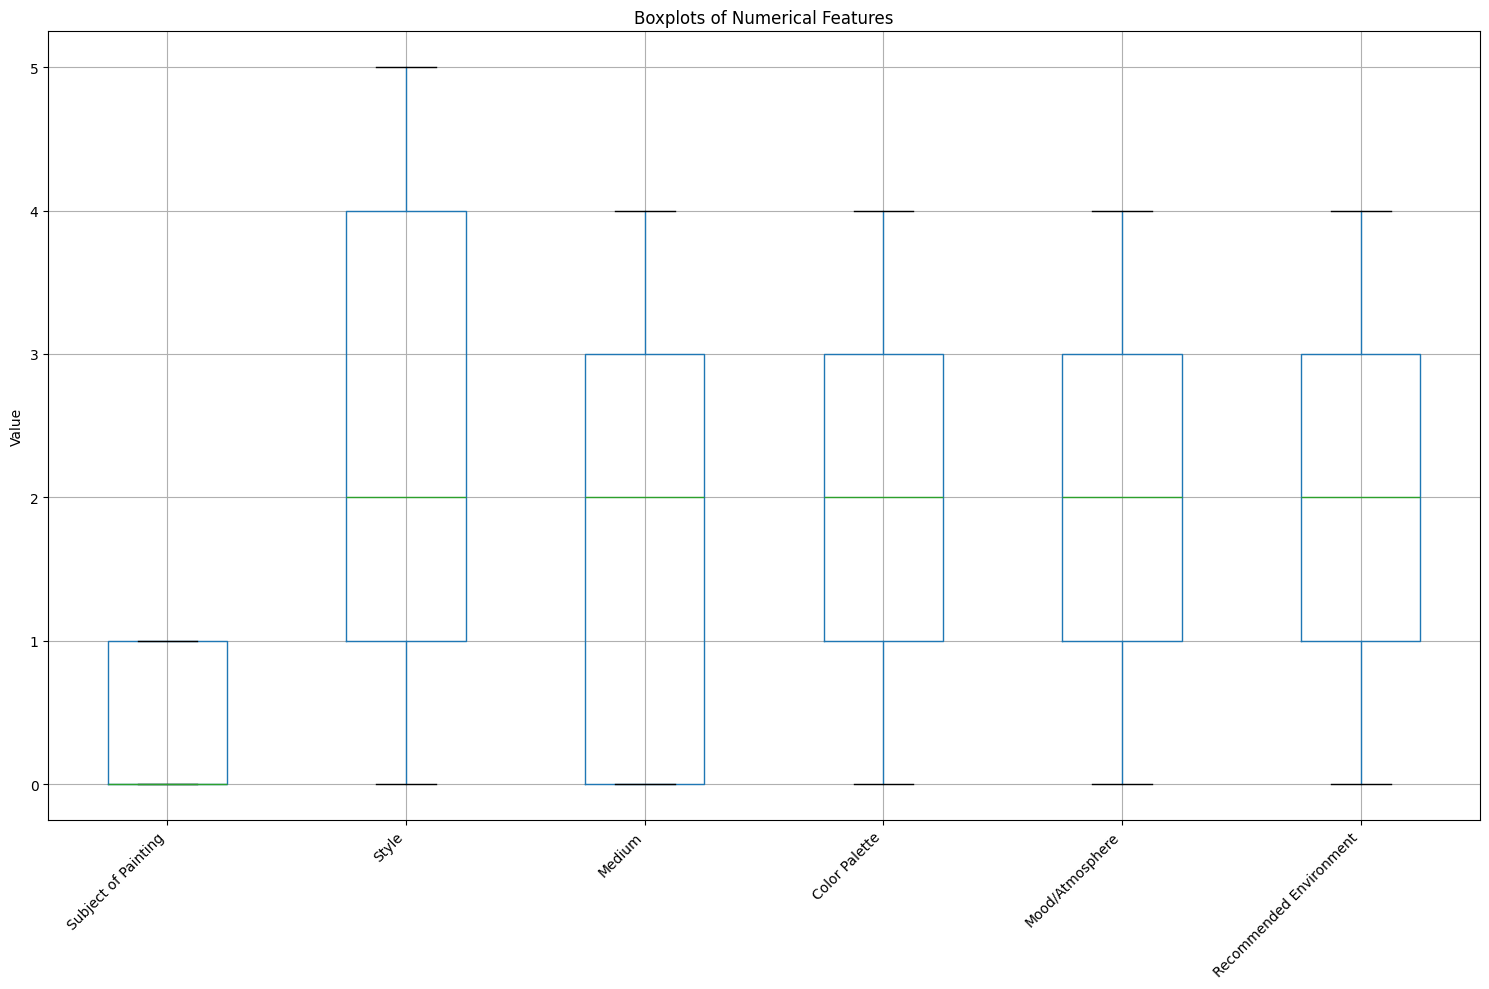

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(15, 10))
df_numeric.boxplot()
plt.title('Boxplots of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Output bloxpot menujukkan bahwa tidak ada data yang outliers

In [14]:
def check_unique1(data):
    for column in data.columns:
        if len(data[column].unique()) == 1:
            print(f"Fitur '{column}' memiliki hanya satu nilai unik.")

check_unique1(df)

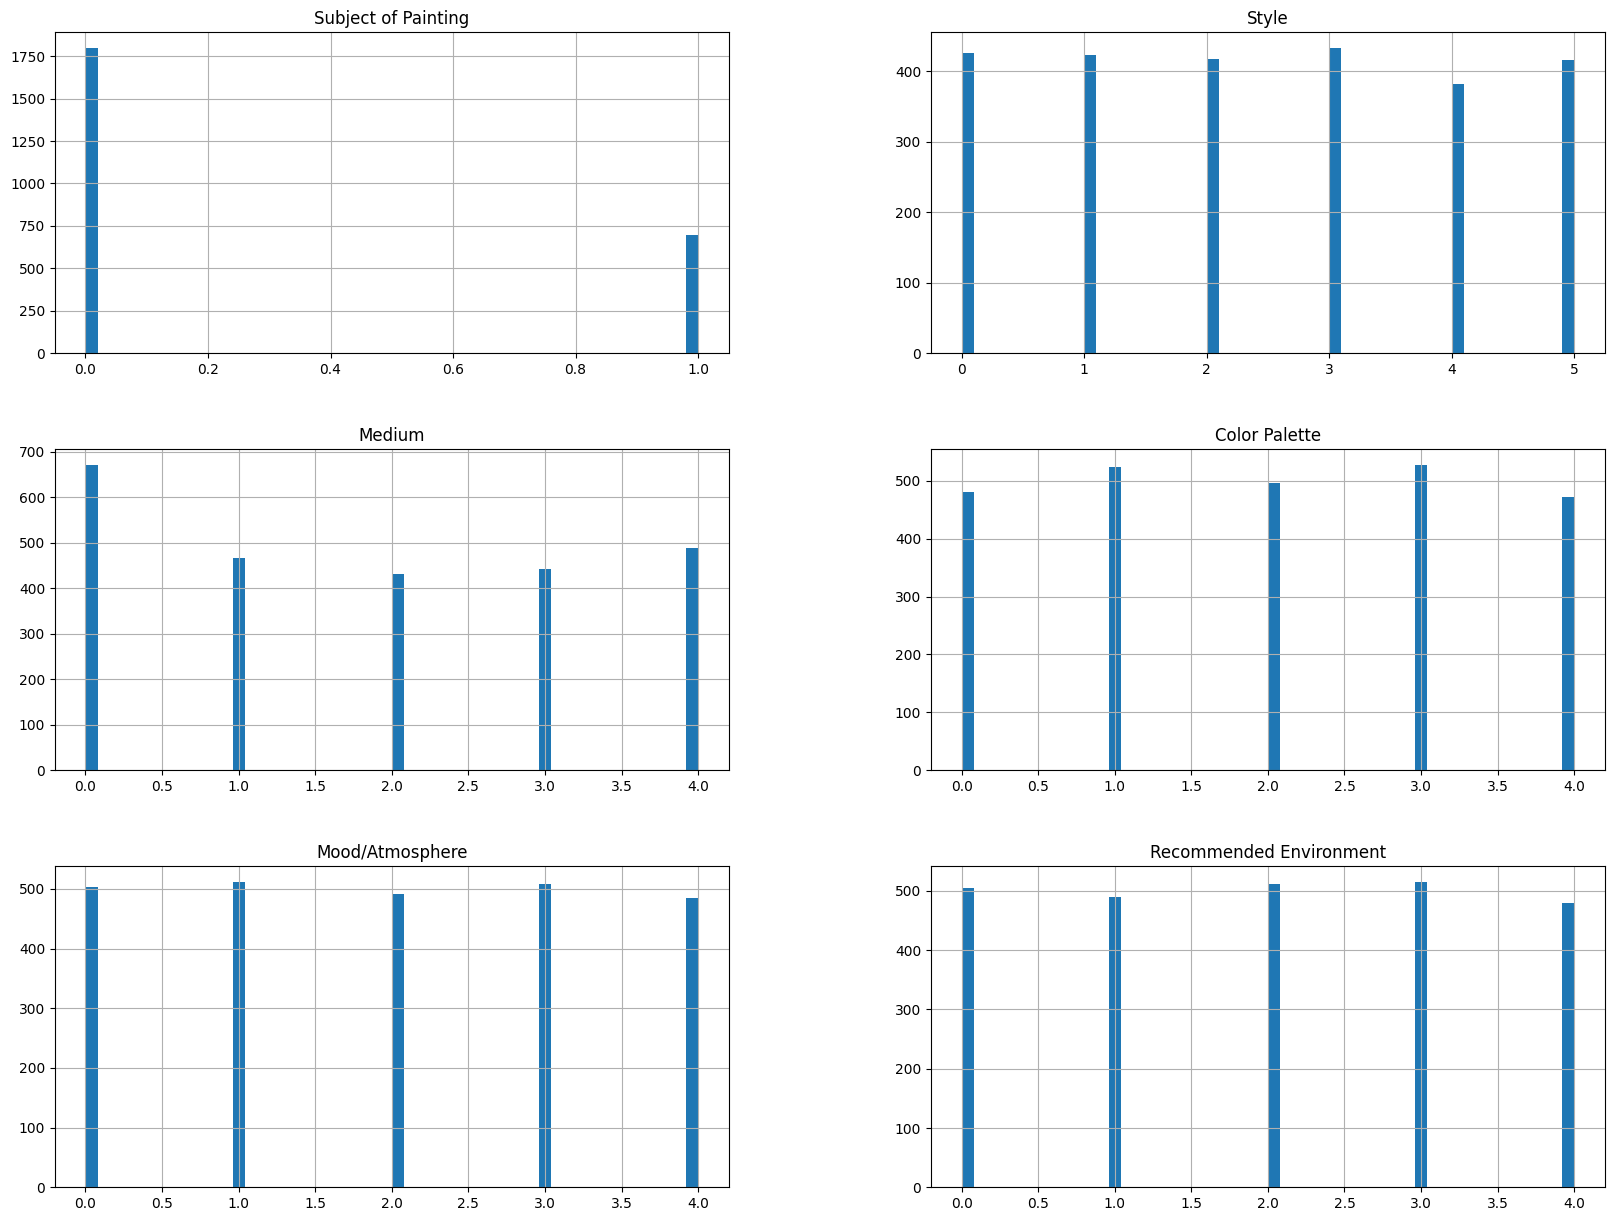

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur')

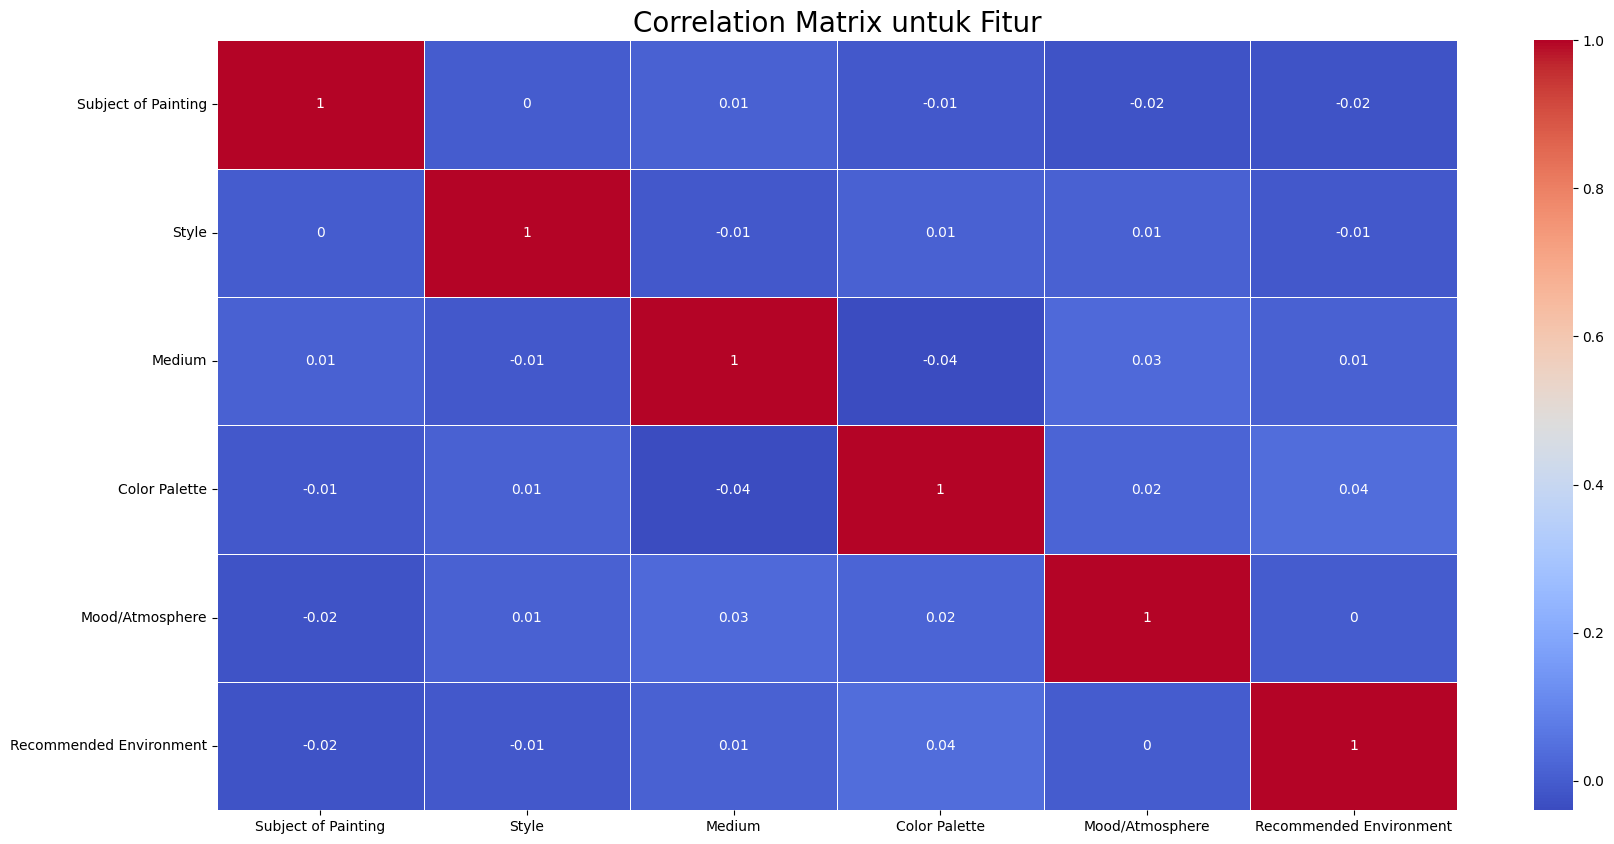

In [16]:
plt.figure(figsize=(20, 10))
correlation_matrix = df_numeric.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur", size=20)

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [21]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Akurasi model terbaik: {accuracy*100:.2f}%")

Parameter terbaik: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Akurasi model terbaik: 77.81%


In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

In [23]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_res, test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model_pca = KNeighborsClassifier(n_neighbors=5)
model_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

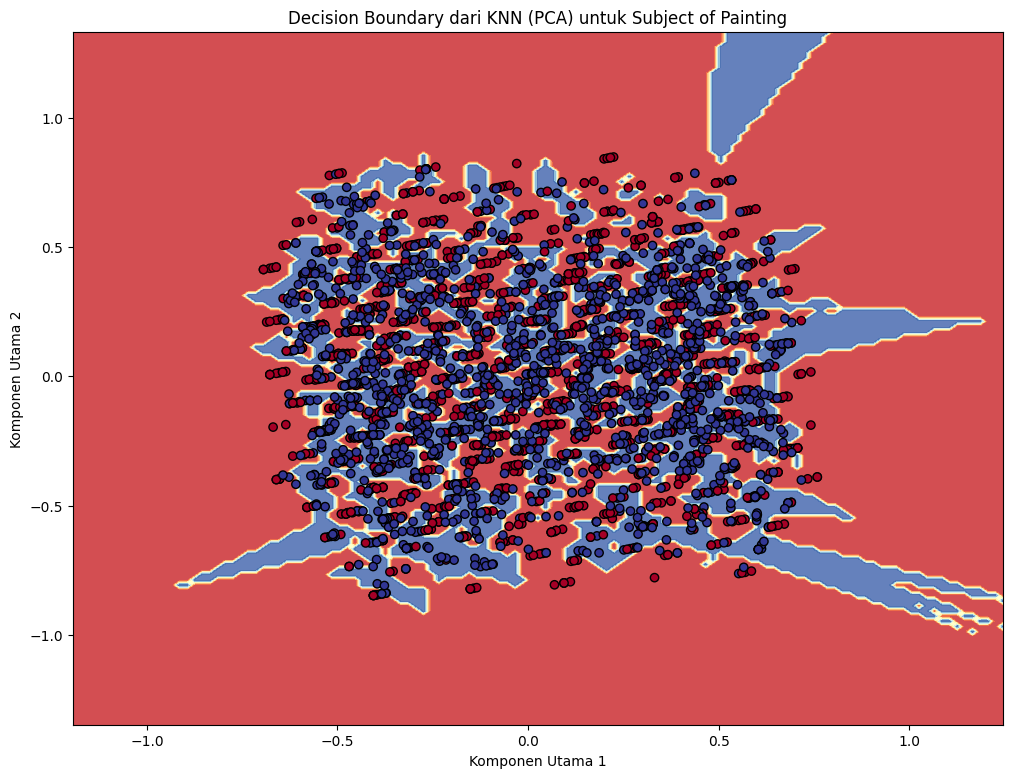

In [25]:
x_min, x_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
y_min, y_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary dari KNN (PCA) untuk Subject of Painting')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

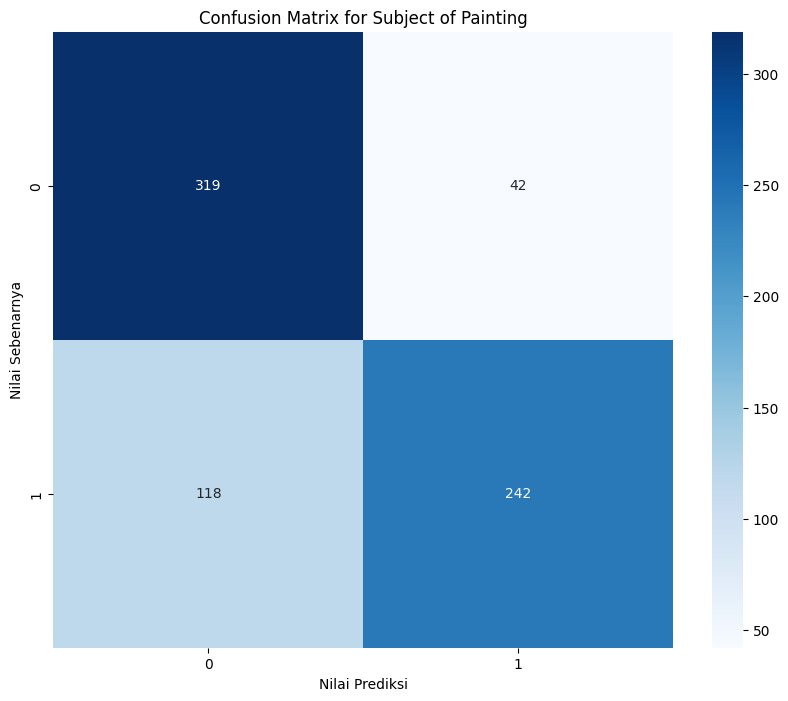

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Subject of Painting')
plt.ylabel('Nilai Sebenarnya')
plt.xlabel('Nilai Prediksi')
plt.show()

In [27]:
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi Akhir Model: {final_accuracy * 100:.2f}%")

Akurasi Akhir Model: 77.81%


In [28]:
import joblib
joblib.dump(model_pca, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

# --- 1. MEMBUAT DAN MELATIH SCALER ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data fitur berhasil di-scaling.")

# --- 2. MENGATASI IMBALANCED DATA DENGAN SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("✅ Data berhasil diseimbangkan dengan SMOTE.")
print(f"Jumlah data setelah SMOTE: {len(y_resampled)}")
print("Distribusi kelas baru:")
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))

# --- 3. MENYIMPAN SCALER DAN SMOTE KE FILE .PKL ---

try:
    # Simpan scaler
    joblib.dump(scaler, 'preprocessor.pkl')
    print("✅ Objek scaler berhasil disimpan sebagai 'preprocessor.pkl'")
except Exception as e:
    print(f"❌ Terjadi kesalahan saat menyimpan preprocessor: {e}")

✅ Data fitur berhasil di-scaling.
✅ Data berhasil diseimbangkan dengan SMOTE.
Jumlah data setelah SMOTE: 3602
Distribusi kelas baru:
{np.int64(0): np.int64(1801), np.int64(1): np.int64(1801)}
✅ Objek scaler berhasil disimpan sebagai 'preprocessor.pkl'
